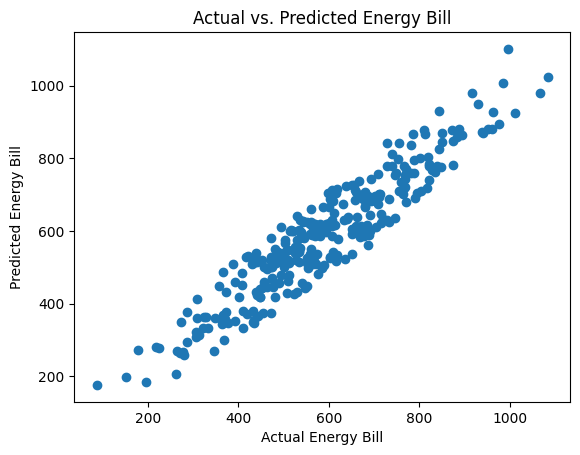

Coefficient of determination (R-squared): 0.88
Intercept: 128.16
Coefficients: [1.34806887e+00 4.52703102e+00 3.15406532e-02 1.63078438e+02
 7.84054929e+01 6.01650151e+01 7.64646024e-04 9.15330590e+01
 2.50512102e+02]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ... your data loading and preprocessing code ... (assuming X and y are defined)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict 'y' values on the test data
y_pred = model.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Bill")  # Adjust based on your target variable
plt.ylabel("Predicted Energy Bill")
plt.title("Actual vs. Predicted Energy Bill")
plt.show()

# Linear Regression Evaluation
# R-squared (coefficient of determination)
r_sq = model.score(X, y)
print(f"Coefficient of determination (R-squared): {r_sq:.2f}")  # Format with 2 decimal places

# Intercept and coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_.ravel()}")  # Flatten the array for printing


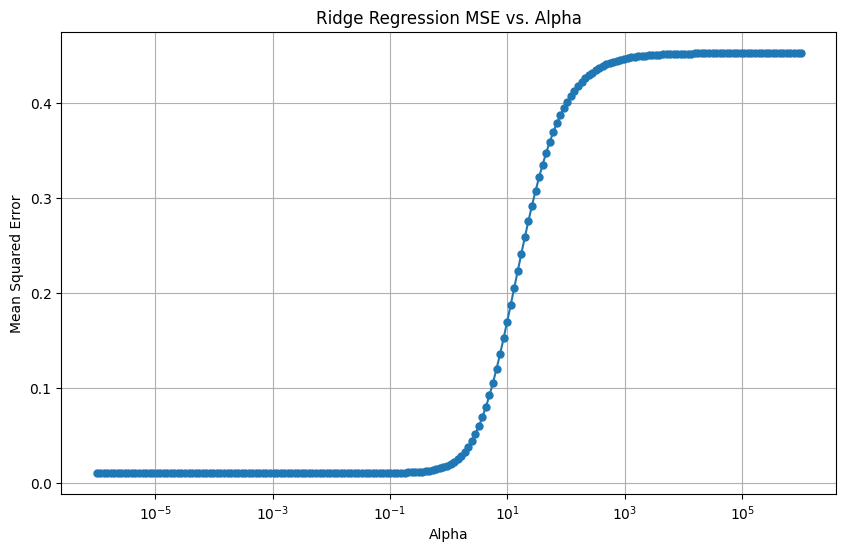

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example data
# X = features, y = target variable
X = np.random.rand(100, 1)
y = 2*X.squeeze() + np.random.randn(100)*0.1

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of alphas to consider for Ridge Regression
alphas = np.logspace(-6, 6, 200)
mse = []

# Train a Ridge Regression model for each alpha and record the MSE
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

# Plotting the MSE against alphas
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse, marker='o', linestyle='-', markersize=5)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression MSE vs. Alpha')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read the CSV file from a ZIP archive into a DataFrame 'df'
df = pd.read_csv('/Household energy bill data.csv')
# Check for missing values in the DataFrame 'df' and fill them with 0 (or a more appropriate strategy)
df = df.fillna(0)  # Replace with a suitable imputation method based on data analysis

# Create a Series 'y' for the target variable 'amount_paid'
y = df['amount_paid']

# Create a DataFrame 'X' for the features
X = df[['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
        'ave_monthly_income', 'num_children', 'is_urban']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_train)

# Calculate RMSE and R2 score for Ridge Regression
rmse_rr = np.sqrt(mean_squared_error(y_train, y_pred_rr))
r2_rr = r2_score(y_train, y_pred_rr)

print(f"RMSE for Ridge Regression: {rmse_rr}")
print(f"R2 Score for Ridge Regression: {r2_rr}")



RMSE for Ridge Regression: 63.89065497641164
R2 Score for Ridge Regression: 0.8788900341182491


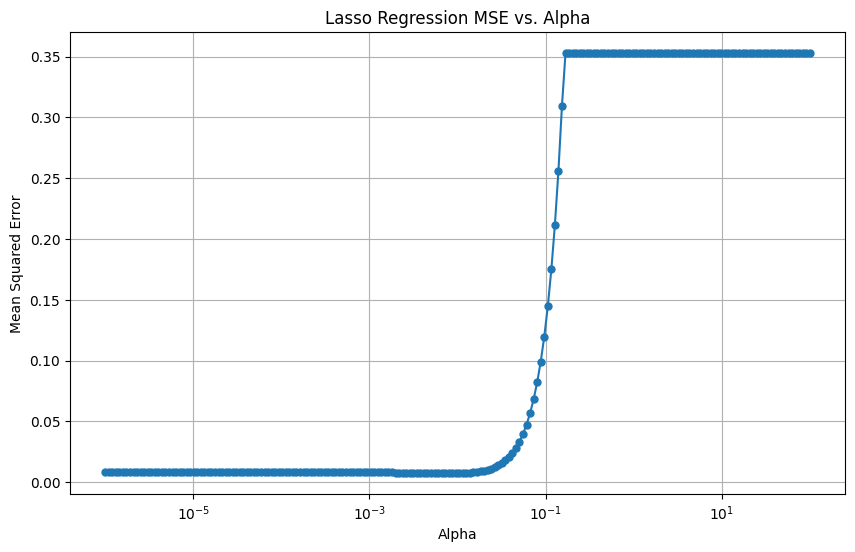

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example data
# X = features, y = target variable
X = np.random.rand(100, 1)
y = 2*X.squeeze() + np.random.randn(100)*0.1

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of alphas to consider for Lasso Regression
alphas = np.logspace(-6, 2, 200)
mse = []

# Train a Lasso Regression model for each alpha and record the MSE
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

# Plotting the MSE against alphas
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse, marker='o', linestyle='-', markersize=5)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression MSE vs. Alpha')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/Household energy bill data.csv')

# Fill missing values (consider exploring imputation techniques)
df = df.fillna(0)  # Replace with a suitable imputation method based on data analysis

# Extract the target variable 'amount_paid'
y = df['amount_paid']

# Extract the features (adjust column names to match your dataset)
X = df[['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_flat', 'ave_monthly_income', 'num_children', 'is_urban']]

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2529)

# Initialize and fit the Lasso Regression model
model_lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
model_lasso.fit(X_train, y_train)

# Make predictions on the test set
pred_test_lasso = model_lasso.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, pred_test_lasso)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 4547.818384359599


Mean Absolute Error (MAE) using Linear Regression: 54.04134389596424


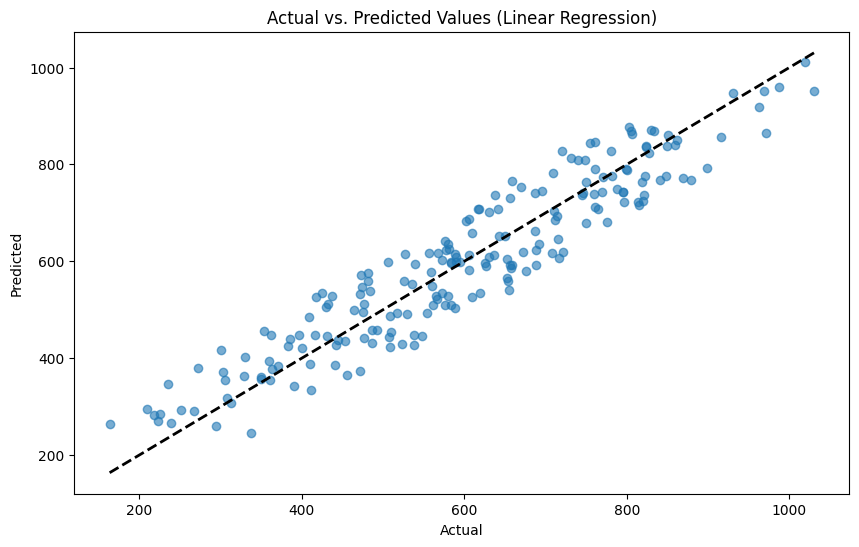

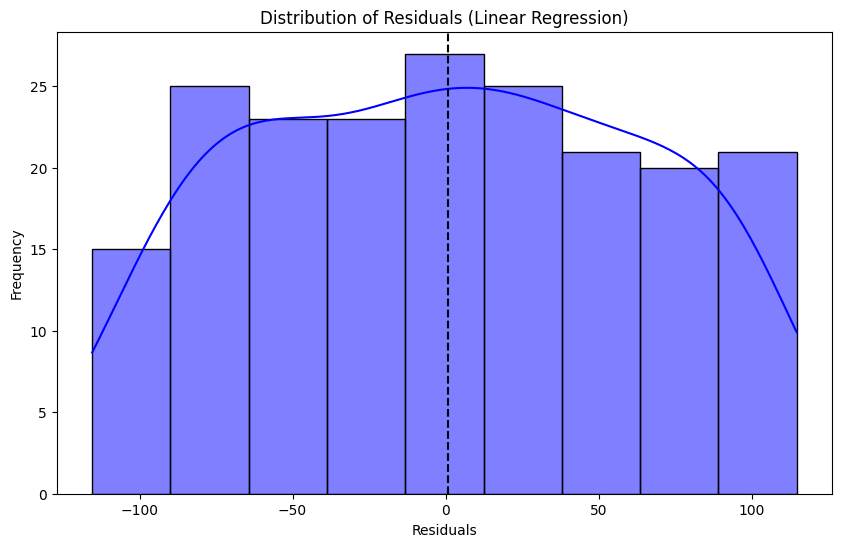

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) using Linear Regression: {mae}')

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Linear Regression)')
plt.show()

Mean Absolute Error (MAE) using Ridge Regression: 54.10543981062389


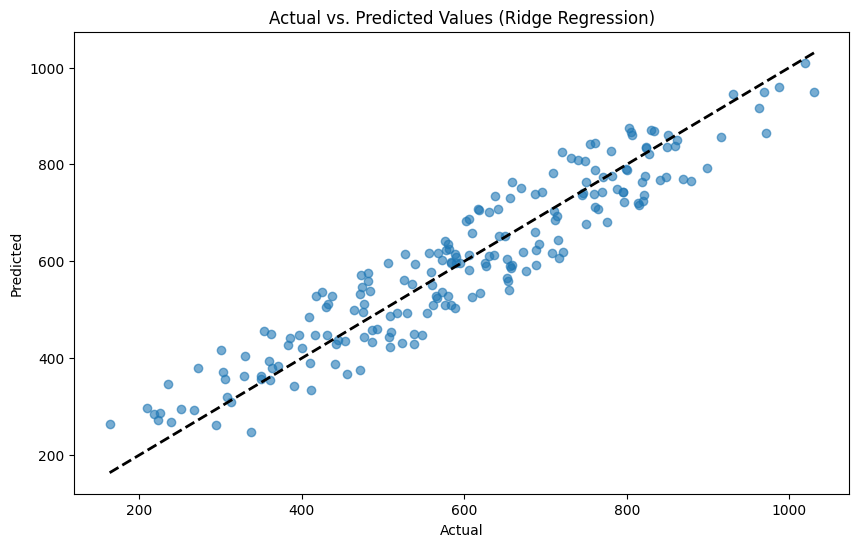

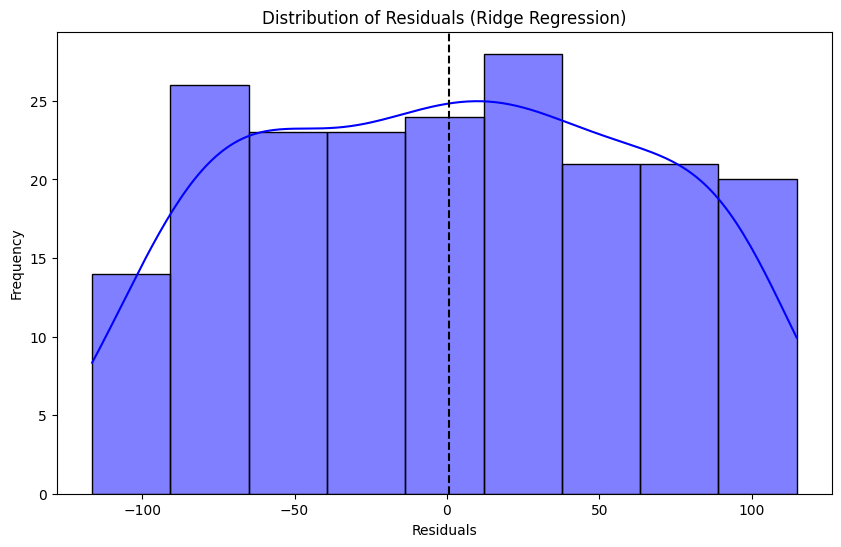

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_reg.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) using Ridge Regression: {mae}')

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Ridge Regression)')
plt.show()

Mean Absolute Error (MAE) using Lasso Regression: 54.117977437262354


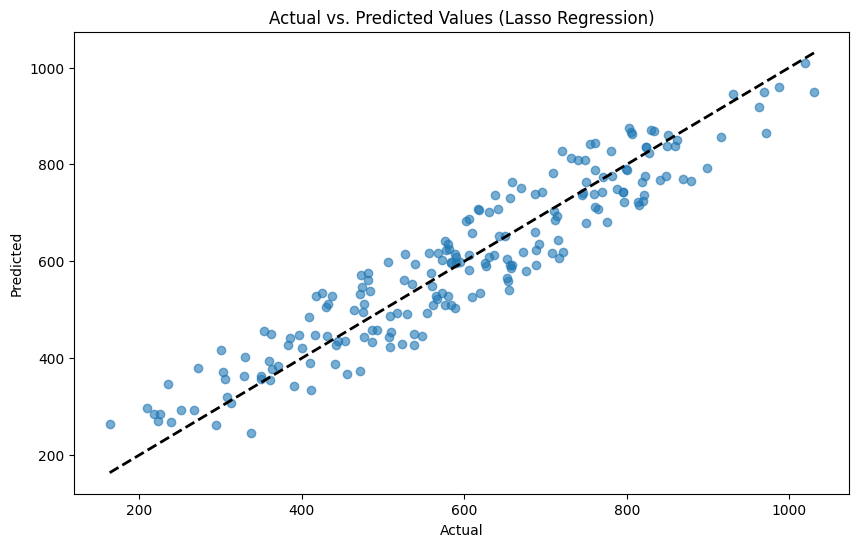

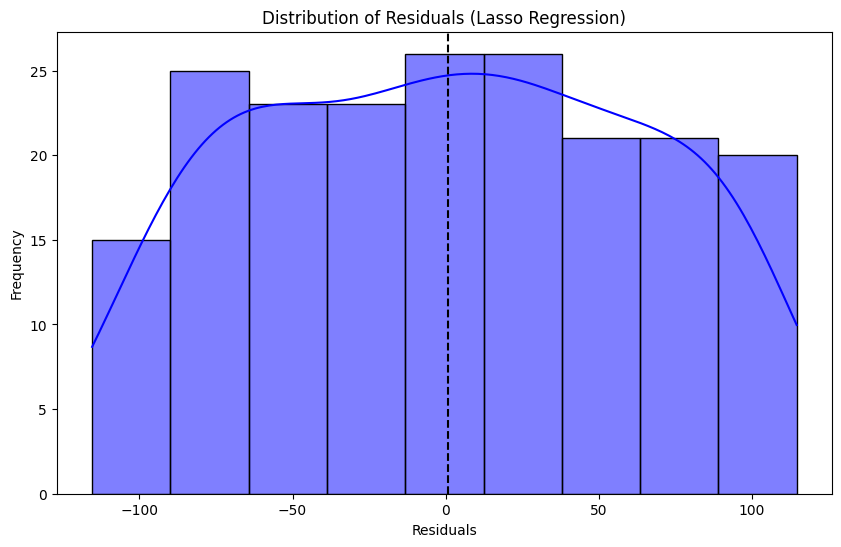

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)  # You can adjust the alpha parameter as needed
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_reg.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) using Lasso Regression: {mae}')

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Lasso Regression)')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Lasso Regression)')
plt.show()

Mean Squared Error (MSE) using Linear Regression: 3958.630021458348


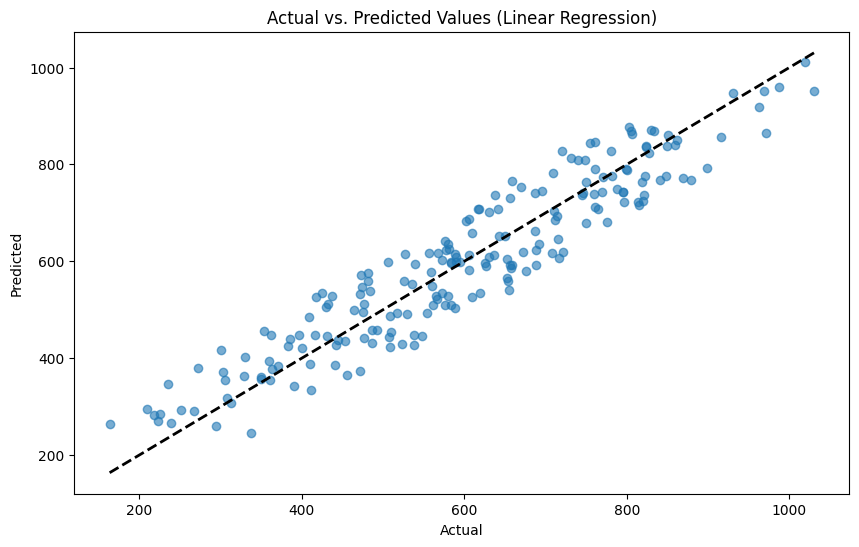

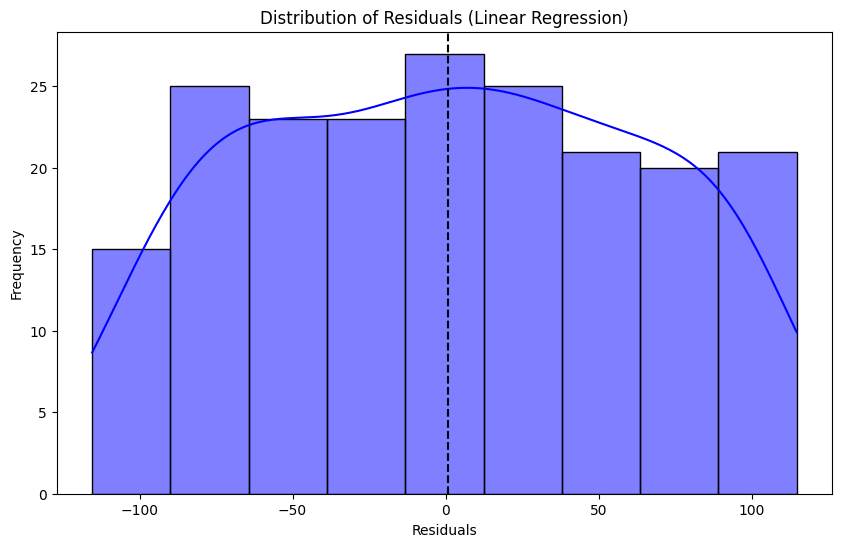

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) using Linear Regression: {mse}')

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Linear Regression)')
plt.show()

Mean Squared Error (MSE) using Ridge Regression: 3962.8072335611737


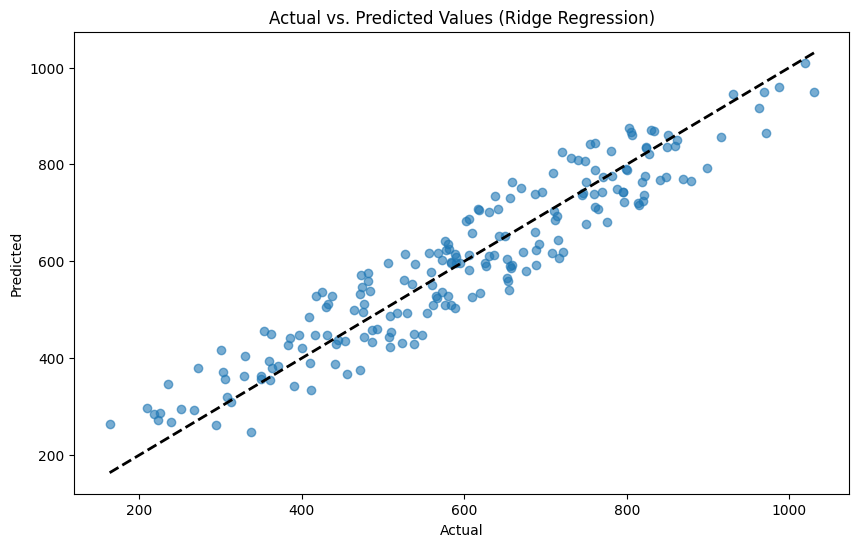

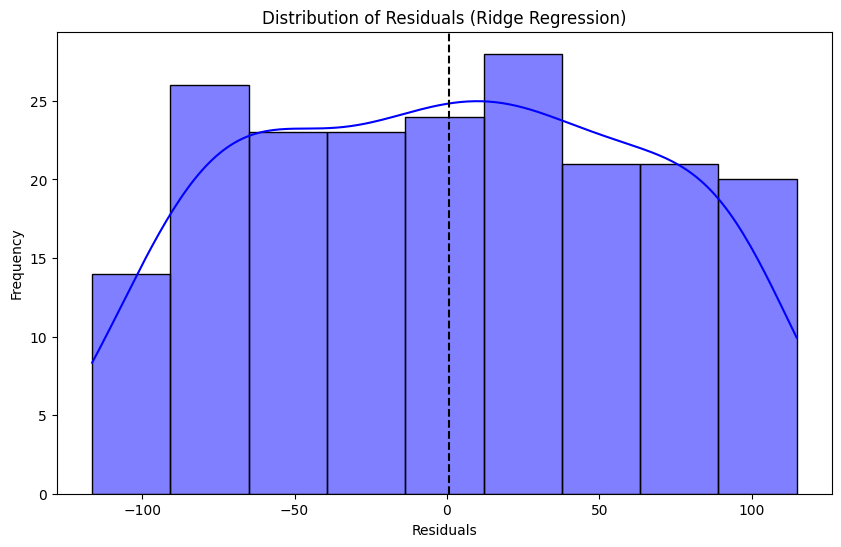

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_reg.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) using Ridge Regression: {mse}')

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Ridge Regression)')
plt.show()

Mean Squared Error (MSE) using Lasso Regression: 3963.6966818584356


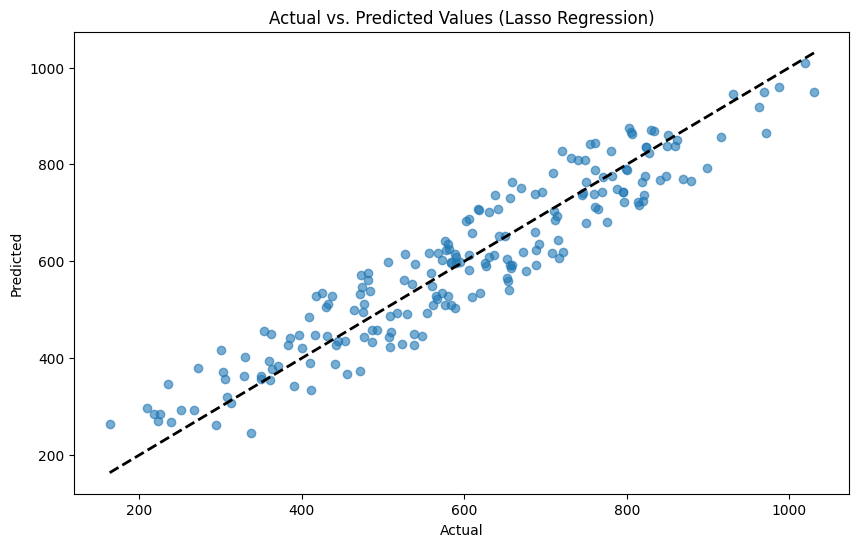

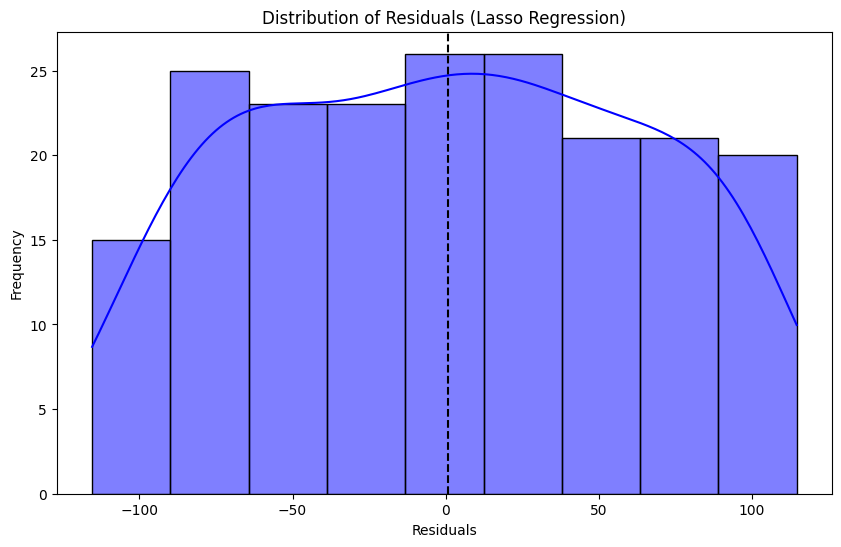

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)  # You can adjust the alpha parameter as needed
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_reg.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) using Lasso Regression: {mse}')

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Lasso Regression)')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Lasso Regression)')
plt.show()

Mean Absolute Percentage Error (MAPE) using Linear Regression: 10.378360194630808%


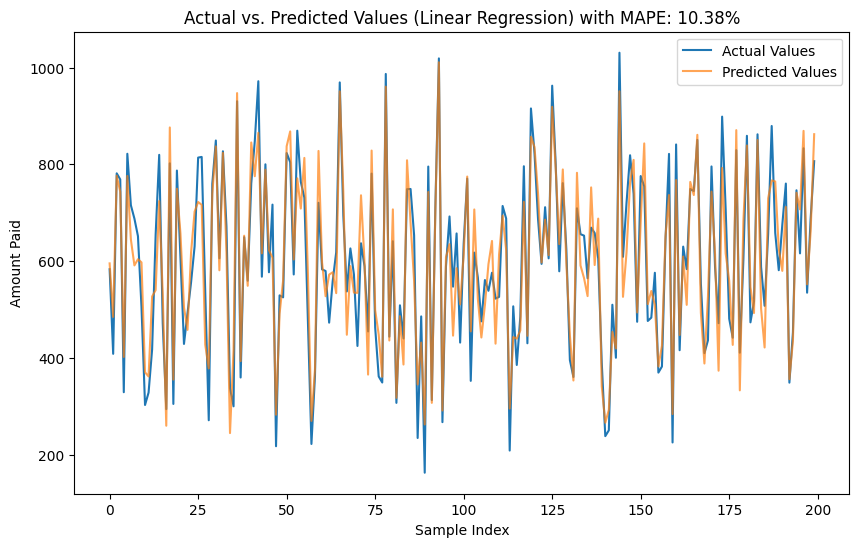

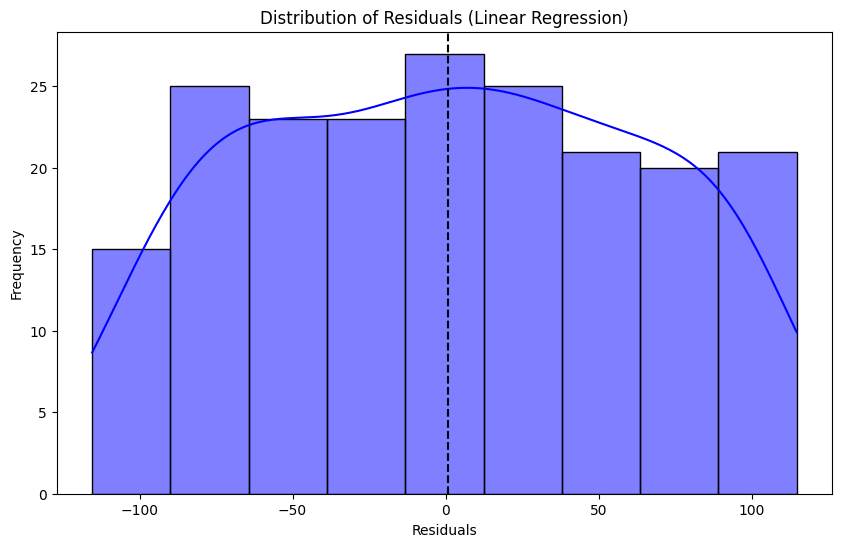

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE) using Linear Regression: {mape}%')

# Plotting Actual vs. Predicted Values with MAPE
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Amount Paid')
plt.title('Actual vs. Predicted Values (Linear Regression) with MAPE: {:.2f}%'.format(mape))
plt.legend()
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Linear Regression)')
plt.show()

Mean Absolute Percentage Error (MAPE) using Ridge Regression: 10.409806870652446%


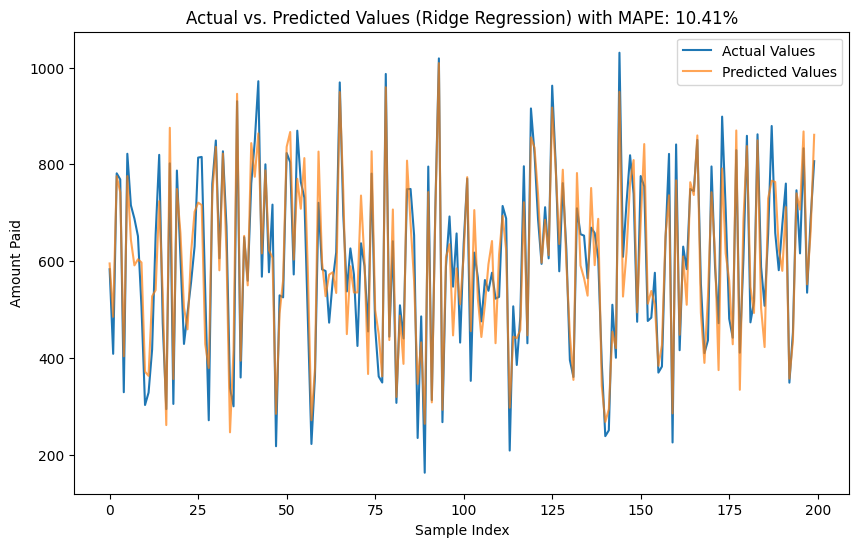

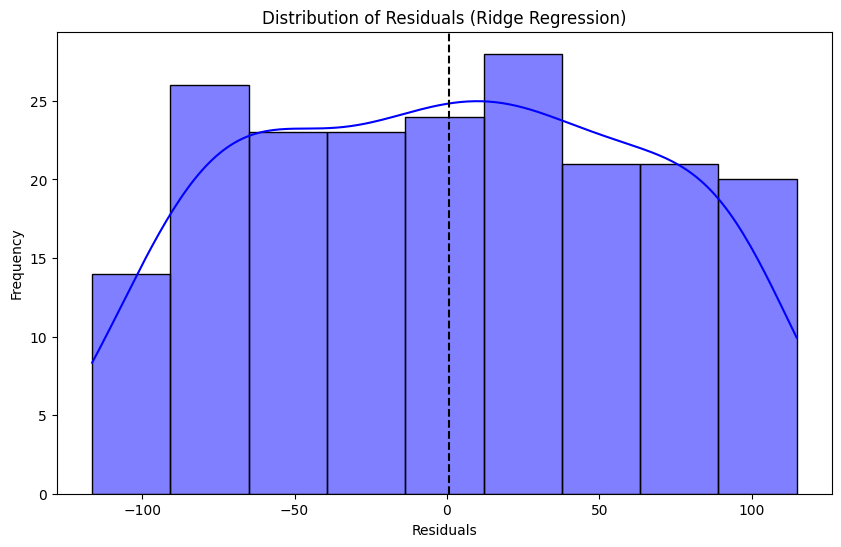

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import seaborn as sns

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_reg.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE) using Ridge Regression: {mape}%')

# Plotting Actual vs. Predicted Values with MAPE
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Amount Paid')
plt.title('Actual vs. Predicted Values (Ridge Regression) with MAPE: {:.2f}%'.format(mape))
plt.legend()
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Ridge Regression)')
plt.show()

Mean Absolute Percentage Error (MAPE) using Lasso Regression: 10.40223535380428%


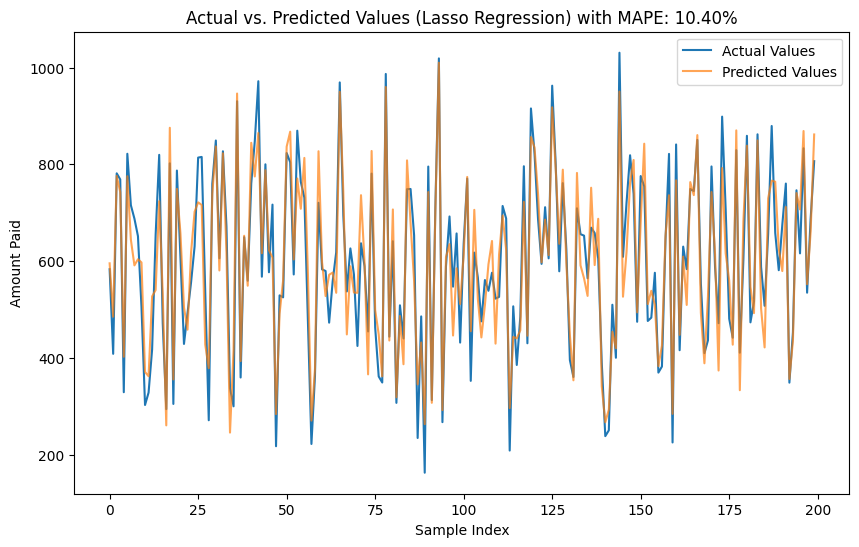

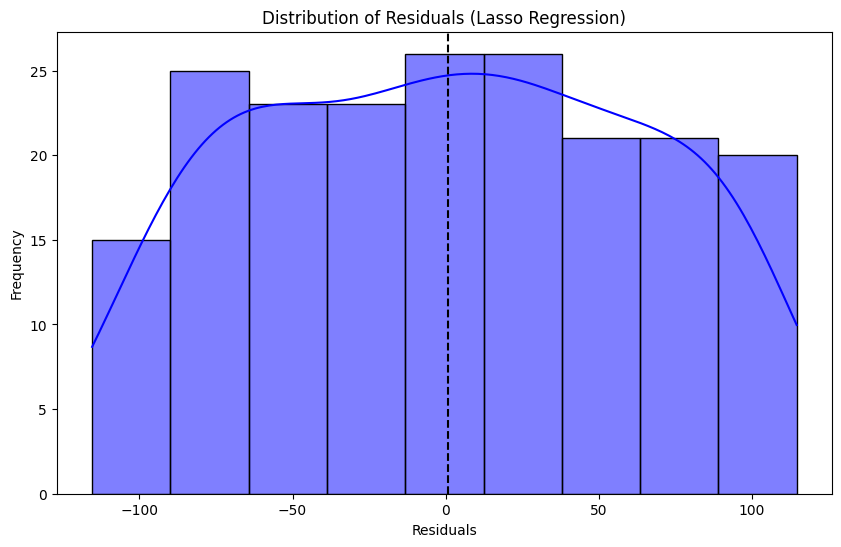

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import seaborn as sns

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0  # Ensure we don't divide by zero
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)  # Alpha is the regularization strength; adjust as needed
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_reg.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE) using Lasso Regression: {mape}%')

# Plotting Actual vs. Predicted Values with MAPE
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Amount Paid')
plt.title('Actual vs. Predicted Values (Lasso Regression) with MAPE: {:.2f}%'.format(mape))
plt.legend()
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Lasso Regression)')
plt.show()

Root Mean Squared Error (RMSE) using Linear Regression: 62.917644754538834


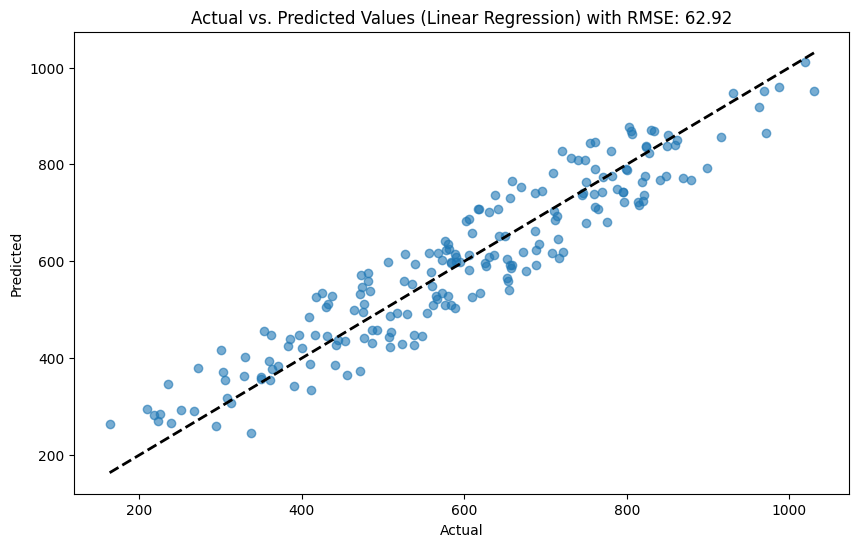

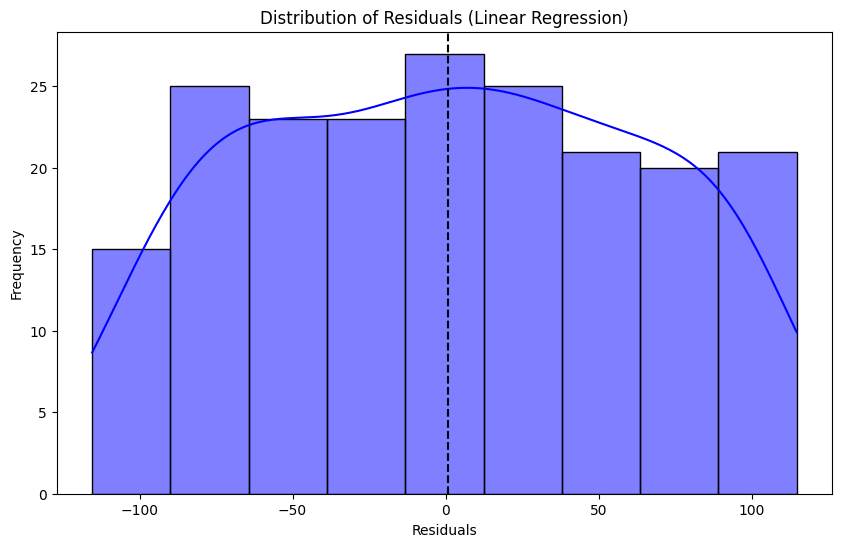

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) using Linear Regression: {rmse}')

# Plotting Actual vs. Predicted Values with RMSE
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted Values (Linear Regression) with RMSE: {rmse:.2f}')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Linear Regression)')
plt.show()

Root Mean Squared Error (RMSE) using Ridge Regression: 62.95083187346434


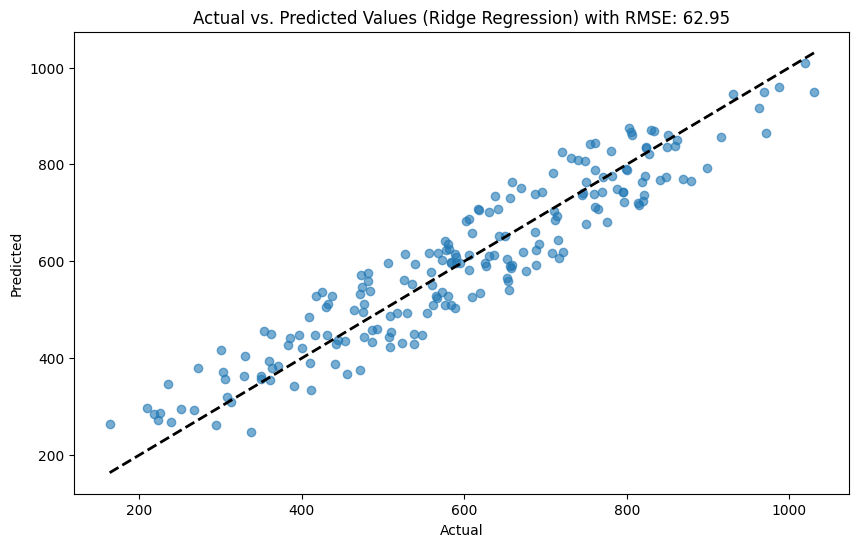

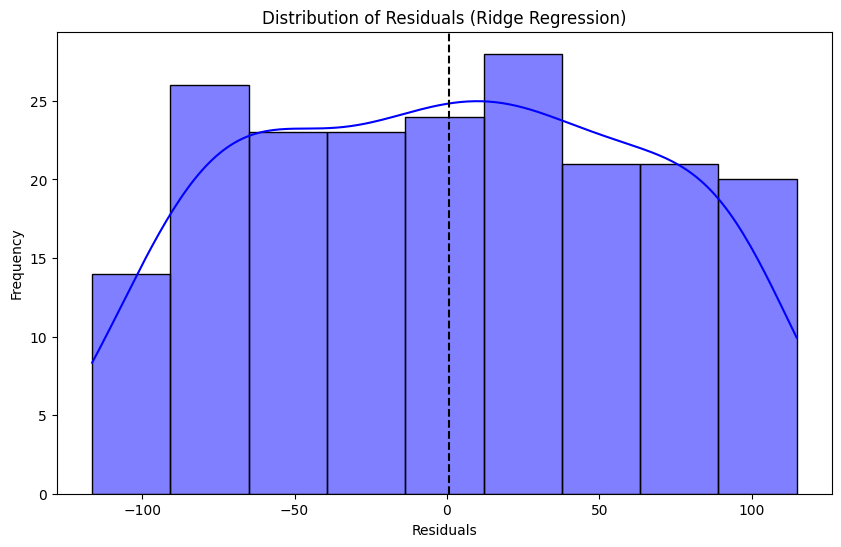

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength; adjust as needed
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) using Ridge Regression: {rmse}')

# Plotting Actual vs. Predicted Values with RMSE
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted Values (Ridge Regression) with RMSE: {rmse:.2f}')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Ridge Regression)')
plt.show()

Root Mean Squared Error (RMSE) using Lasso Regression: 62.957896104130064


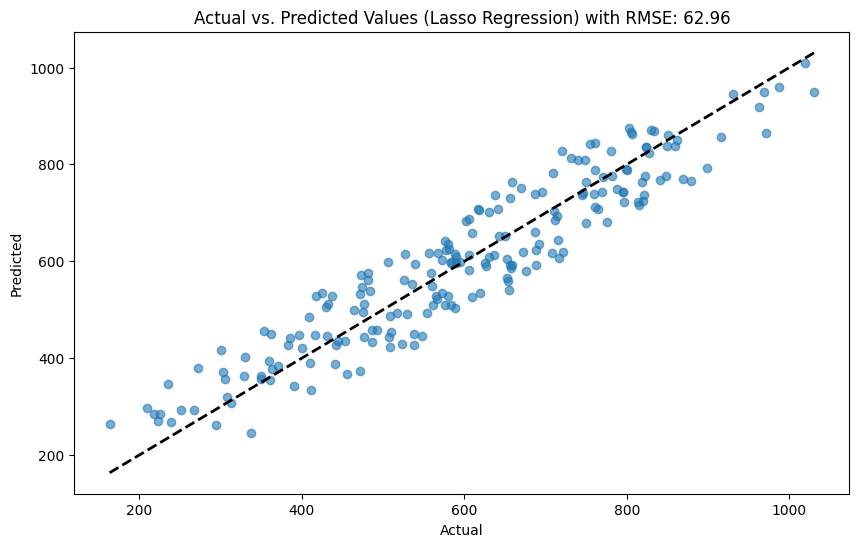

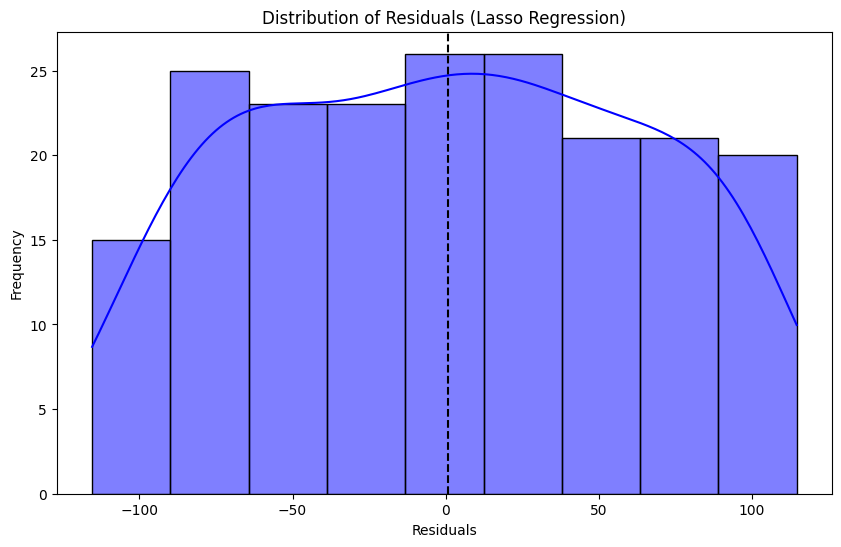

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Household energy bill data.csv')

# Assuming 'amount_paid' is the target variable and the rest are features
X = df.drop('amount_paid', axis=1)
y = df['amount_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)  # Alpha is the regularization strength; adjust as needed
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) using Lasso Regression: {rmse}')

# Plotting Actual vs. Predicted Values with RMSE
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted Values (Lasso Regression) with RMSE: {rmse:.2f}')
plt.show()

# Plotting the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', edgecolor='black')
plt.axvline(x=residuals.mean(), color='k', linestyle='--')  # Mean line of residuals
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Lasso Regression)')
plt.show()